# 기계학습 특강 (6주차) 10월5일 Homework
> 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Machine Learning]

## imports

In [198]:
import torch
import torchvision
from fastai.data.all import *
import matplotlib.pyplot as plt

## 숙제 (해설 및 풀이는 [여기](https://guebin.github.io/DL2022/2022/10/06/(6%EC%A3%BC%EC%B0%A8)-10%EC%9B%946%EC%9D%BC.html#%EC%88%99%EC%A0%9C)참고) 

(1) 숫자0과 숫자1을 구분하는 네트워크를 아래와 같은 구조로 설계하라

$$\underset{(n,784)}{\bf X} \overset{l_1}{\to} \underset{(n,64)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,64)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$$

위에서 $a_1$은 relu를, $a_2$는 sigmoid를 의미한다. 

- "y=0"은 숫자0을 의미하도록 하고 "y=1"은 숫자1을 의미하도록 설정하라. 

In [700]:
path = untar_data(URLs.MNIST)

In [701]:
zero_fnames = (path/'training/0').ls()

In [702]:
one_fnames = (path/'training/1').ls()

In [703]:
X0 = torch.stack([torchvision.io.read_image(str(zf)) for zf in zero_fnames])

In [704]:
X1 = torch.stack([torchvision.io.read_image(str(of)) for of in one_fnames])

In [705]:
X = torch.concat([X0,X1],axis=0).reshape(-1,1*28*28).float()

In [709]:
y = torch.tensor([0.0]*len(X0) + [1.0]*len(X1)).reshape(-1,1)

In [710]:
torch.manual_seed(12345)
net = torch.nn.Sequential(
    torch.nn.Linear(784,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,1),
    torch.nn.Sigmoid()
)

(2) 아래의 지침에 따라 200 epoch 학습을 진행하라.
- 손실함수는 BECLoss를 이용할 것. torch.nn.BCELoss() 를 이용할 것. 
- 옵티마이저는 아담으로 설정할 것. 학습률은 lr=0.002로 설정할 것. 

In [711]:
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.002)

In [712]:
for epoc in range(200):
    yhat = net(X)
    loss = loss_fn(yhat,y)
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

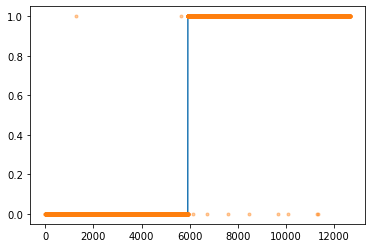

In [713]:
plt.plot(y)
plt.plot(yhat.data,'.',alpha=0.4)

(3) 아래의 지침에 따라 200 epoch 학습을 진행하라. 학습이 잘 되는가? 
- 손실함수는 BECLoss를 이용할 것. torch.nn.BCELoss()를 사용하지 않고 수식을 직접 입력할 것.
- 옵티마이저는 아담으로 설정할 것. 학습률은 lr=0.002로 설정할 것. 

In [714]:
torch.manual_seed(12345)
net = torch.nn.Sequential(
    torch.nn.Linear(784,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,1),
    torch.nn.Sigmoid()
)

In [715]:
optimizr = torch.optim.Adam(net.parameters(),lr=0.002)

In [716]:
for epoc in range(200):
    yhat = net(X)
    loss = -torch.mean(y*torch.log(yhat) + (1-y)*torch.log(1-yhat))
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

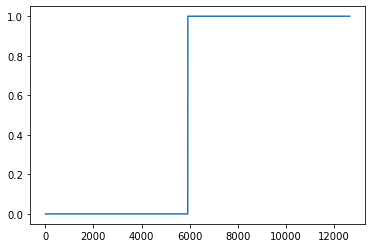

In [717]:
plt.plot(y)
plt.plot(yhat.data,'.',alpha=0.4)

In [718]:
yhat.data

tensor([[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]])

학습이 잘 되지 않았다.

(4) 아래의 지침에 따라 200 epoch 학습을 진행하라. 학습이 잘 되는가? 
- 이미지의 값을 0과 1사이로 규격화 하라. (Xnp = Xnp/255 를 이용하세요!)
- 손실함수는 BECLoss를 이용할 것. torch.nn.BCELoss()를 사용하지 않고 수식을 직접 입력할 것.
- 옵티마이저는 아담으로 설정할 것. 학습률은 lr=0.002로 설정할 것. 

In [719]:
X = X/255

In [720]:
torch.manual_seed(12345)
net = torch.nn.Sequential(
    torch.nn.Linear(784,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,1),
    torch.nn.Sigmoid()
)

In [721]:
optimizr=torch.optim.Adam(net.parameters(),lr=0.002)

In [722]:
for epoc in range(200):
    yhat = net(X)
    loss = -torch.mean(y*torch.log(yhat) + (1-y)*torch.log(1-yhat))
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

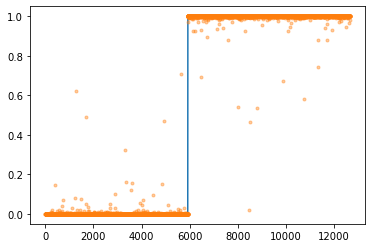

In [723]:
plt.plot(y)
plt.plot(yhat.data,'.',alpha=0.4)

(5) 아래와 같은 수식을 이용하여 accuracy를 계산하라. 

$\text{accuracy}=\frac{1}{n}\sum_{i=1}^n I(\tilde{y}_i=y_i)$
- $\tilde{y}_i = \begin{cases}
 1 & \hat{y}_i > 0.5 \\ 
 0 & \hat{y}_i \leq 0.5 
\end{cases}$ 
- $I(\tilde{y}_i=y_i) = \begin{cases} 1 & \tilde{y}_i=y_i \\ 0 & \tilde{y}_i \neq y_i \end{cases}$

단, $n$은 0과 1을 의미하는 이미지의 수 

In [724]:
ytilde = (yhat > 0.5) * 1

In [725]:
ytilde

tensor([[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]])

In [726]:
(ytilde == y) * 1

tensor([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]])

In [727]:
torch.sum((ytilde == y) * 1)

tensor(12661)

In [728]:
torch.sum((ytilde == y) * 1)/len(y)

tensor(0.9997)

In [730]:
print("accuraccy: ",torch.sum((ytilde == y) * 1)/len(y))

accuraccy:  tensor(0.9997)
